<a href="https://www.kaggle.com/code/shigeokitamura/pearson-correlation-test-with-advertising-dataset?scriptVersionId=219261462" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/Advertising.csv


# Load Dataset

In [2]:
data = pd.read_csv('/kaggle/input/advertising-dataset/Advertising.csv')

In [3]:
data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Relationship between TV advertising and sales

**Null Hypothesis (H₀)**: There is no linear relationship between TV advertising and sales (r = 0)

**Alternative Hypothesis (H₀)**: There is a linear relationship between the two variables (r ≠ 0)

In [4]:
import scipy.stats as stats

In [5]:
tv_advertising = data['TV']

In [6]:
print(tv_advertising)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64


In [7]:
sales = data['Sales']

In [8]:
print(sales)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [9]:
correlation_coefficient, p_value = stats.pearsonr(tv_advertising, sales)

In [10]:
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.7822244248616064
P-value: 1.4673897001947286e-42


Since 0.7 ≤ ∣r∣ < 1, there is a strong positive linear relationship between TV advertising and sales.

And since the p value is less than 0.05, we reject the null hypthesis, suggesting that the relationship is statistically significant.

# Relationship between radio advertising and sales

In [11]:
radio = data['Radio']
print(radio)

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64


In [12]:
sales = data['Sales']
print(sales)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [13]:
correlation_coefficient, p_value = stats.pearsonr(radio, sales)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.5762225745710552
P-value: 4.354966001766856e-19


# Relationship between newspaper advertising and sales

In [14]:
newspaper = data['Newspaper']
print(newspaper)

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 200, dtype: float64


In [15]:
print(sales)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [16]:
correlation_coefficient, p_value = stats.pearsonr(newspaper, sales)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.2282990263761653
P-value: 0.0011481958688882258


Since the correlation is between 0 < ∣r∣ < 0.3 there is a Weak correlation  between Newspaper and sales.

And since the p value is less than 0.05, we reject the null hypthesis, suggesting that the relationship is statistically significant.

This is a bit different from the other onces since it is a positive difference but it's not a big and notorious as the other onces, P value is still lower than 0.05.

# Visualization

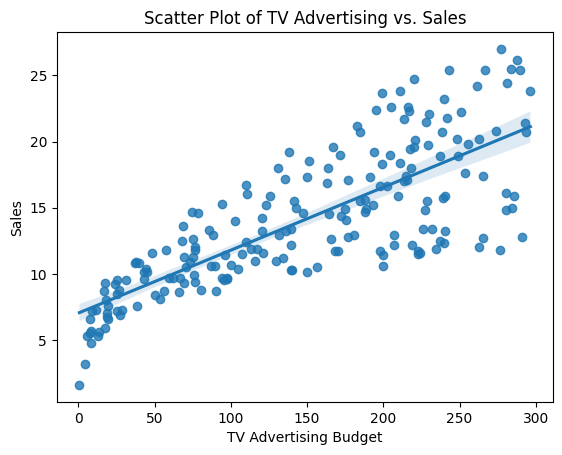

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot with a trend line
sns.regplot(x='TV', y='Sales', data=data)
plt.title('Scatter Plot of TV Advertising vs. Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.show()

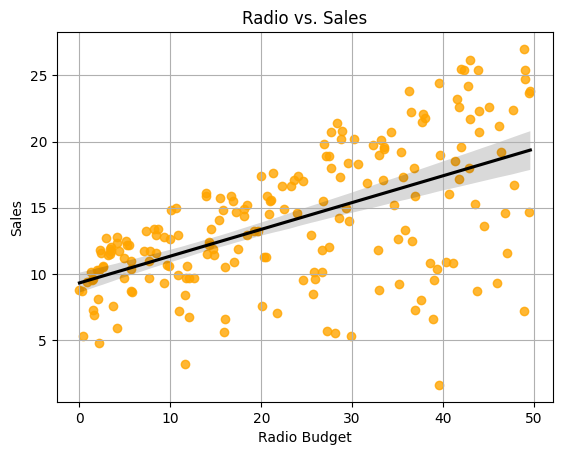

In [18]:
sns.regplot(x='Radio', y='Sales', data=data, scatter_kws={'color': 'orange'},line_kws={'color': 'black'})
plt.title('Radio vs. Sales')
plt.xlabel('Radio Budget')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

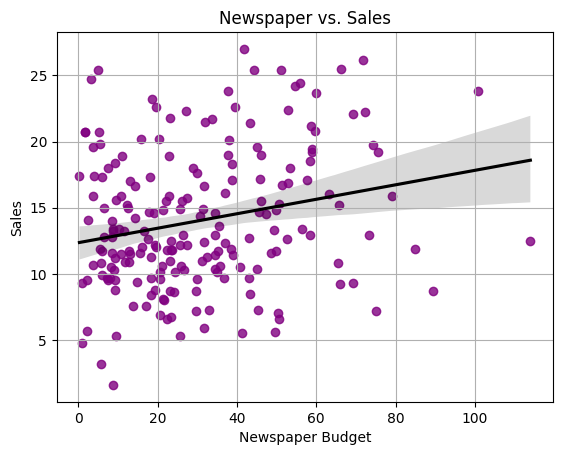

In [19]:
sns.regplot(x='Newspaper', y='Sales', data=data, scatter_kws={'color': 'purple'},line_kws={'color': 'black'})
plt.title('Newspaper vs. Sales')
plt.xlabel('Newspaper Budget')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Conclusion
Based on the data we find and the graphs made to make it easier to understand we can confidently say all the marking works, since across the 3 medias (newspaper, TV and Radio) there was an increase in sales. With that being said we could see difference between the 3 of them, as the most succesfull one is TV being strongly correlated with sales, Radio as the second place just a little behind being moderate correlation with sales and lastly by a long shot, Newspaper meaning they do have a correlation with sales but it's in way smaller corralation than the other 2 medias and in it self it's not really noticiable, but it still is a correlation.